In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
import os
sys.path.append('/content/drive/MyDrive/pytorch-time-series-classification-main')

sys

In [ ]:
import tisc1

In [ ]:
def load_csi_data(file_path):
    """Load CSI data from CSV file, extracting the 25th column."""
    df = pd.read_csv(file_path, usecols=[25], header=None)
    csi_data = df[25].apply(lambda x: np.fromstring(x[1:-1], dtype=float, sep=' '))
    return np.stack(csi_data.values)

def segment_recording(recording, segment_length=1000):
    """Segment a recording into 10-second chunks."""
    num_segments = recording.shape[0] // segment_length
    return recording[:num_segments*segment_length].reshape(-1, segment_length, 128), num_segments

data_dir = r"/content/drive/MyDrive/CSI data"

csi_data_list = []
labels_list = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        rate, duration = folder.split('-')
        rate = int(rate)

        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(folder_path, file)
                raw_data = load_csi_data(file_path)
                segmented_data, num_segments = segment_recording(raw_data)
                csi_data_list.append(segmented_data)
                labels_list.extend([rate] * num_segments)


csi_data = np.concatenate(csi_data_list, axis=0)
labels = np.array(labels_list)

In [ ]:
print(csi_data.shape)

print(raw_data.shape[0])
print(raw_data[1])
print(labels[2])

In [ ]:
num_segments = raw_data.shape[0] // 1000
segmented_data, number_segments = raw_data[:num_segments*1000].reshape(-1, 1000, 128), num_segments

segmented_data[1][0]


In [ ]:
# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(csi_data, labels, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

train_data = torch.from_numpy(X_train).float()
train_label = torch.from_numpy(y_train).float()
val_data = torch.from_numpy(X_val).float()
val_label = torch.from_numpy(y_val).float()
test_data = torch.from_numpy(X_test).float()
test_label = torch.from_numpy(y_test).float()

# TensorDatasets
train_dataset = TensorDataset(train_data, train_label)
val_dataset = TensorDataset(val_data, val_label)
test_dataset = TensorDataset(test_data, test_label)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Number of classes: {len(torch.unique(train_label))}")

# Verify the shapes
for batch_data, batch_labels in train_loader:
    print("Batch data shape:", batch_data.shape)
    print("Batch labels shape:", batch_labels.shape)
    break

Train set size: 204
Validation set size: 68
Test set size: 69
Number of classes: 6
Batch data shape: torch.Size([204, 1000, 128])
Batch labels shape: torch.Size([204])


In [ ]:
print(test_data.shape)  # (1000, 20, 100)

print(test_label.shape)  # (1000,)

print(train_label.shape)
print(train_data.shape)


torch.Size([51, 1000, 128])
torch.Size([51])
torch.Size([152])
torch.Size([152, 1000, 128])


In [ ]:
classifier = tisc1.build_classifier(model_name='LSTM',
                                   timestep=1000,
                                   dimentions=128,
                                   num_classes=1)
print(type(classifier))

<class 'tisc1.tisc.Classifier'>


-- Start Training01 --


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([204])) that is different to the input size (torch.Size([204, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([68])) that is different to the input size (torch.Size([68, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[Epoch 1/100] training_loss: 994.813110351562 training_accuracy: 0.000000000000 val_loss: 985.249572753906 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 2/100] training_loss: 953.580993652344 training_accuracy: 0.000000000000 val_loss: 941.397399902344 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 3/100] training_loss: 910.355346679688 training_accuracy: 0.000000000000 val_loss: 895.128967285156 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 4/100] training_loss: 863.521423339844 training_accuracy: 0.000000000000 val_loss: 847.041687011719 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 5/100] training_loss: 817.780822753906 training_accuracy: 0.000000000000 val_loss: 795.505493164062 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 6/100] training_loss: 766.739013671875 training_accuracy: 0.000000000000 val_loss: 740.185241699219 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 7/100] training_loss: 715.691040039062 training_accuracy: 0.000000000000 val_loss: 681.078002929688 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 8/100] training_loss: 654.964355468750 training_accuracy: 0.000000000000 val_loss: 618.347106933594 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 9/100] training_loss: 595.179443359375 training_accuracy: 0.000000000000 val_loss: 551.918334960938 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 10/100] training_loss: 522.333007812500 training_accuracy: 0.000000000000 val_loss: 482.292999267578 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 11/100] training_loss: 457.574768066406 training_accuracy: 0.000000000000 val_loss: 411.095886230469 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 12/100] training_loss: 386.978790283203 training_accuracy: 0.000000000000 val_loss: 341.950683593750 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 13/100] training_loss: 322.213409423828 training_accuracy: 0.000000000000 val_loss: 279.116363525391 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 14/100] training_loss: 260.817718505859 training_accuracy: 0.000000000000 val_loss: 227.873794555664 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 15/100] training_loss: 211.300140380859 training_accuracy: 0.000000000000 val_loss: 193.498229980469 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 16/100] training_loss: 182.635498046875 training_accuracy: 0.000000000000 val_loss: 180.627410888672 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 17/100] training_loss: 173.905639648438 training_accuracy: 0.000000000000 val_loss: 190.129943847656 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 18/100] training_loss: 186.217666625977 training_accuracy: 0.000000000000 val_loss: 213.090225219727 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 19/100] training_loss: 206.462997436523 training_accuracy: 0.000000000000 val_loss: 233.386871337891 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 20/100] training_loss: 223.802047729492 training_accuracy: 0.000000000000 val_loss: 238.240600585938 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 21/100] training_loss: 238.458816528320 training_accuracy: 0.000000000000 val_loss: 225.320800781250 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 22/100] training_loss: 224.778060913086 training_accuracy: 0.000000000000 val_loss: 204.102783203125 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 23/100] training_loss: 202.130859375000 training_accuracy: 0.000000000000 val_loss: 186.773452758789 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 24/100] training_loss: 180.806457519531 training_accuracy: 0.000000000000 val_loss: 180.693191528320 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 25/100] training_loss: 173.539642333984 training_accuracy: 0.000000000000 val_loss: 185.173324584961 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 26/100] training_loss: 174.915832519531 training_accuracy: 0.000000000000 val_loss: 193.524978637695 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 27/100] training_loss: 182.832550048828 training_accuracy: 0.000000000000 val_loss: 199.250671386719 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 28/100] training_loss: 186.866226196289 training_accuracy: 0.000000000000 val_loss: 200.506149291992 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 29/100] training_loss: 188.833587646484 training_accuracy: 0.000000000000 val_loss: 197.756988525391 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 30/100] training_loss: 188.666946411133 training_accuracy: 0.000000000000 val_loss: 192.730163574219 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 31/100] training_loss: 182.971832275391 training_accuracy: 0.000000000000 val_loss: 187.428268432617 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 32/100] training_loss: 177.526412963867 training_accuracy: 0.000000000000 val_loss: 183.301483154297 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 33/100] training_loss: 171.909088134766 training_accuracy: 0.000000000000 val_loss: 181.066390991211 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 34/100] training_loss: 172.306732177734 training_accuracy: 0.000000000000 val_loss: 180.670928955078 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 35/100] training_loss: 171.753356933594 training_accuracy: 0.000000000000 val_loss: 181.539916992188 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 36/100] training_loss: 175.096542358398 training_accuracy: 0.000000000000 val_loss: 182.739593505859 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 37/100] training_loss: 176.210632324219 training_accuracy: 0.000000000000 val_loss: 183.572799682617 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 38/100] training_loss: 178.395446777344 training_accuracy: 0.000000000000 val_loss: 183.606735229492 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 39/100] training_loss: 176.027297973633 training_accuracy: 0.000000000000 val_loss: 183.039031982422 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 40/100] training_loss: 177.658706665039 training_accuracy: 0.000000000000 val_loss: 182.043106079102 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 41/100] training_loss: 177.171737670898 training_accuracy: 0.000000000000 val_loss: 181.090896606445 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 42/100] training_loss: 174.294158935547 training_accuracy: 0.000000000000 val_loss: 180.618331909180 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 43/100] training_loss: 173.347839355469 training_accuracy: 0.000000000000 val_loss: 180.812072753906 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 44/100] training_loss: 173.667465209961 training_accuracy: 0.000000000000 val_loss: 181.559631347656 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 45/100] training_loss: 173.053024291992 training_accuracy: 0.000000000000 val_loss: 182.547744750977 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 46/100] training_loss: 172.521179199219 training_accuracy: 0.000000000000 val_loss: 183.504486083984 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 47/100] training_loss: 173.243515014648 training_accuracy: 0.000000000000 val_loss: 184.129714965820 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 48/100] training_loss: 173.902420043945 training_accuracy: 0.000000000000 val_loss: 184.182281494141 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 49/100] training_loss: 176.732986450195 training_accuracy: 0.000000000000 val_loss: 183.790756225586 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 50/100] training_loss: 176.140731811523 training_accuracy: 0.000000000000 val_loss: 182.951812744141 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 51/100] training_loss: 173.252670288086 training_accuracy: 0.000000000000 val_loss: 182.049514770508 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 52/100] training_loss: 174.227798461914 training_accuracy: 0.000000000000 val_loss: 181.255981445312 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 53/100] training_loss: 173.261962890625 training_accuracy: 0.000000000000 val_loss: 180.789474487305 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 54/100] training_loss: 174.281433105469 training_accuracy: 0.000000000000 val_loss: 180.610839843750 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 55/100] training_loss: 173.667892456055 training_accuracy: 0.000000000000 val_loss: 180.621109008789 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 56/100] training_loss: 173.374679565430 training_accuracy: 0.000000000000 val_loss: 180.696075439453 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 57/100] training_loss: 173.765548706055 training_accuracy: 0.000000000000 val_loss: 180.733673095703 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 58/100] training_loss: 175.277145385742 training_accuracy: 0.000000000000 val_loss: 180.700988769531 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 59/100] training_loss: 173.975036621094 training_accuracy: 0.000000000000 val_loss: 180.639068603516 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 60/100] training_loss: 173.786468505859 training_accuracy: 0.000000000000 val_loss: 180.599456787109 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 61/100] training_loss: 172.118118286133 training_accuracy: 0.000000000000 val_loss: 180.643447875977 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 62/100] training_loss: 171.095565795898 training_accuracy: 0.000000000000 val_loss: 180.799774169922 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 63/100] training_loss: 172.126007080078 training_accuracy: 0.000000000000 val_loss: 181.087020874023 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 64/100] training_loss: 173.014038085938 training_accuracy: 0.000000000000 val_loss: 181.408508300781 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 65/100] training_loss: 172.553009033203 training_accuracy: 0.000000000000 val_loss: 181.719802856445 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 66/100] training_loss: 173.521881103516 training_accuracy: 0.000000000000 val_loss: 181.968139648438 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 67/100] training_loss: 174.496520996094 training_accuracy: 0.000000000000 val_loss: 182.100845336914 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 68/100] training_loss: 172.850341796875 training_accuracy: 0.000000000000 val_loss: 182.011718750000 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 69/100] training_loss: 172.954177856445 training_accuracy: 0.000000000000 val_loss: 181.824172973633 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 70/100] training_loss: 172.263687133789 training_accuracy: 0.000000000000 val_loss: 181.555908203125 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 71/100] training_loss: 173.325988769531 training_accuracy: 0.000000000000 val_loss: 181.252487182617 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 72/100] training_loss: 172.503128051758 training_accuracy: 0.000000000000 val_loss: 180.986740112305 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 73/100] training_loss: 173.479858398438 training_accuracy: 0.000000000000 val_loss: 180.791641235352 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 74/100] training_loss: 172.945129394531 training_accuracy: 0.000000000000 val_loss: 180.666900634766 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 75/100] training_loss: 172.957916259766 training_accuracy: 0.000000000000 val_loss: 180.612548828125 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 76/100] training_loss: 171.619766235352 training_accuracy: 0.000000000000 val_loss: 180.599929809570 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 77/100] training_loss: 172.510238647461 training_accuracy: 0.000000000000 val_loss: 180.600021362305 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 78/100] training_loss: 172.636032104492 training_accuracy: 0.000000000000 val_loss: 180.608612060547 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 79/100] training_loss: 174.257400512695 training_accuracy: 0.000000000000 val_loss: 180.636596679688 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 80/100] training_loss: 172.798324584961 training_accuracy: 0.000000000000 val_loss: 180.691268920898 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 81/100] training_loss: 171.306823730469 training_accuracy: 0.000000000000 val_loss: 180.772949218750 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 82/100] training_loss: 173.345886230469 training_accuracy: 0.000000000000 val_loss: 180.870376586914 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 83/100] training_loss: 173.040618896484 training_accuracy: 0.000000000000 val_loss: 180.946273803711 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 84/100] training_loss: 173.486587524414 training_accuracy: 0.000000000000 val_loss: 181.000106811523 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 85/100] training_loss: 173.428222656250 training_accuracy: 0.000000000000 val_loss: 181.059997558594 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 86/100] training_loss: 172.276046752930 training_accuracy: 0.000000000000 val_loss: 181.066162109375 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 87/100] training_loss: 172.710144042969 training_accuracy: 0.000000000000 val_loss: 181.062591552734 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


[Epoch 88/100] training_loss: 172.199493408203 training_accuracy: 0.000000000000 val_loss: 181.002838134766 val_accuracy: 0.000000000000
Predicted values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True values: [25.0, 25.0, 20.0, 20.0, 40.0, 30.0, 25.0, 30.0, 20.0, 20.0, 25.0, 20.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 25.0, 50.0, 60.0, 20.0, 20.0, 20.0, 25.0, 50.0, 25.0, 60.0, 20.0, 20.0, 20.0, 20.0, 20.0, 60.0, 50.0, 40.0, 60.0, 20.0, 40.0, 20.0, 20.0, 50.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 20.0, 60.0, 20.0, 20.0, 50.0, 25.0, 20.0, 25.0, 20.0, 20.0, 30.0, 20.0, 30.0, 20.0, 20.0, 40.0, 20.0, 40.0, 20.0, 50.0]


Training interrupted. Saving the checkpoint...
Checkpoint saved.


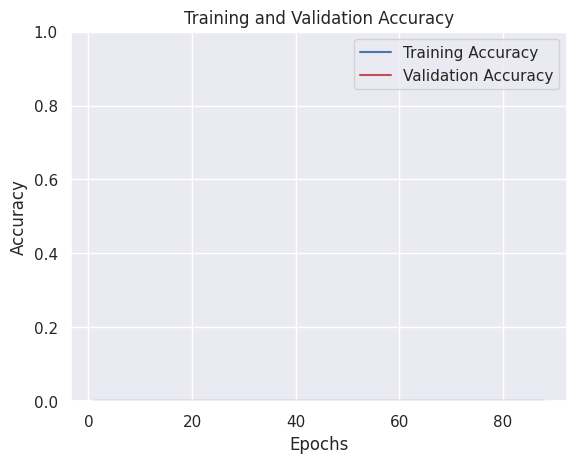

In [ ]:
# classifier.train(epochs = 100, train_loader = train_loader)

# If the `val_loader` argument is passed, you can train the classifier with validation.
classifier.train(100, train_loader, val_loader)


#classifier.train(100, train_loader, val_loader=val_loader)
# 100 (epochs) and train_loader are positional arguments.
# val_loader=val_loader is a keyword argument.

In [ ]:
for inputs, labels in train_loader:

  print(labels.shape)

labels

torch.Size([152])


tensor([20., 20., 20., 20., 20., 60., 20., 20., 20., 20., 20., 60., 20., 40.,
        30., 20., 20., 20., 30., 20., 20., 20., 20., 20., 30., 20., 20., 60.,
        30., 20., 60., 30., 20., 60., 20., 20., 20., 40., 30., 20., 30., 20.,
        60., 20., 40., 40., 20., 20., 20., 30., 20., 60., 20., 20., 20., 20.,
        30., 20., 60., 20., 20., 40., 20., 40., 20., 30., 20., 20., 20., 20.,
        60., 60., 20., 20., 20., 30., 60., 60., 20., 60., 20., 40., 20., 20.,
        20., 20., 20., 20., 20., 40., 20., 60., 20., 40., 20., 60., 20., 40.,
        20., 20., 20., 20., 30., 20., 20., 20., 60., 20., 40., 20., 20., 20.,
        20., 60., 30., 20., 40., 20., 30., 20., 20., 20., 20., 20., 40., 20.,
        20., 60., 20., 20., 20., 20., 20., 60., 60., 20., 20., 40., 60., 20.,
        40., 20., 20., 20., 30., 40., 20., 30., 40., 20., 20., 20.])